In [1]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output
import warnings
data = pd.read_csv('sleep.csv')
data.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [2]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [3]:
# Encode categorical variables, converts categorical data to numerical data
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['University_Year'] = label_encoder.fit_transform(data['University_Year'])
# Convert Sleep Start and End times to appropriate ranges (24-hour format to␣ ↪minutes for easier analysis)
def convert_time_to_minutes(time): 
    hours = int(time)
    minutes = (time - hours) * 60
    return hours * 60 + minutes
data['Weekday_Sleep_Start'] = data['Weekday_Sleep_Start']. apply(convert_time_to_minutes)
data['Weekend_Sleep_Start'] = data['Weekend_Sleep_Start']. apply(convert_time_to_minutes)
data['Weekday_Sleep_End'] = data['Weekday_Sleep_End']. apply(convert_time_to_minutes)
data['Weekend_Sleep_End'] = data['Weekend_Sleep_End']. apply(convert_time_to_minutes)
# Display preprocessed data
data.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,849.6,243.0,444.6,423.6
1,2,21,1,0,6.3,6.0,1.9,5,74,2,523.8,426.0,492.6,612.6
2,3,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,1228.2,412.8,655.2
3,4,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,244.8,401.4,565.2
4,5,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,367.2,538.8,540.6


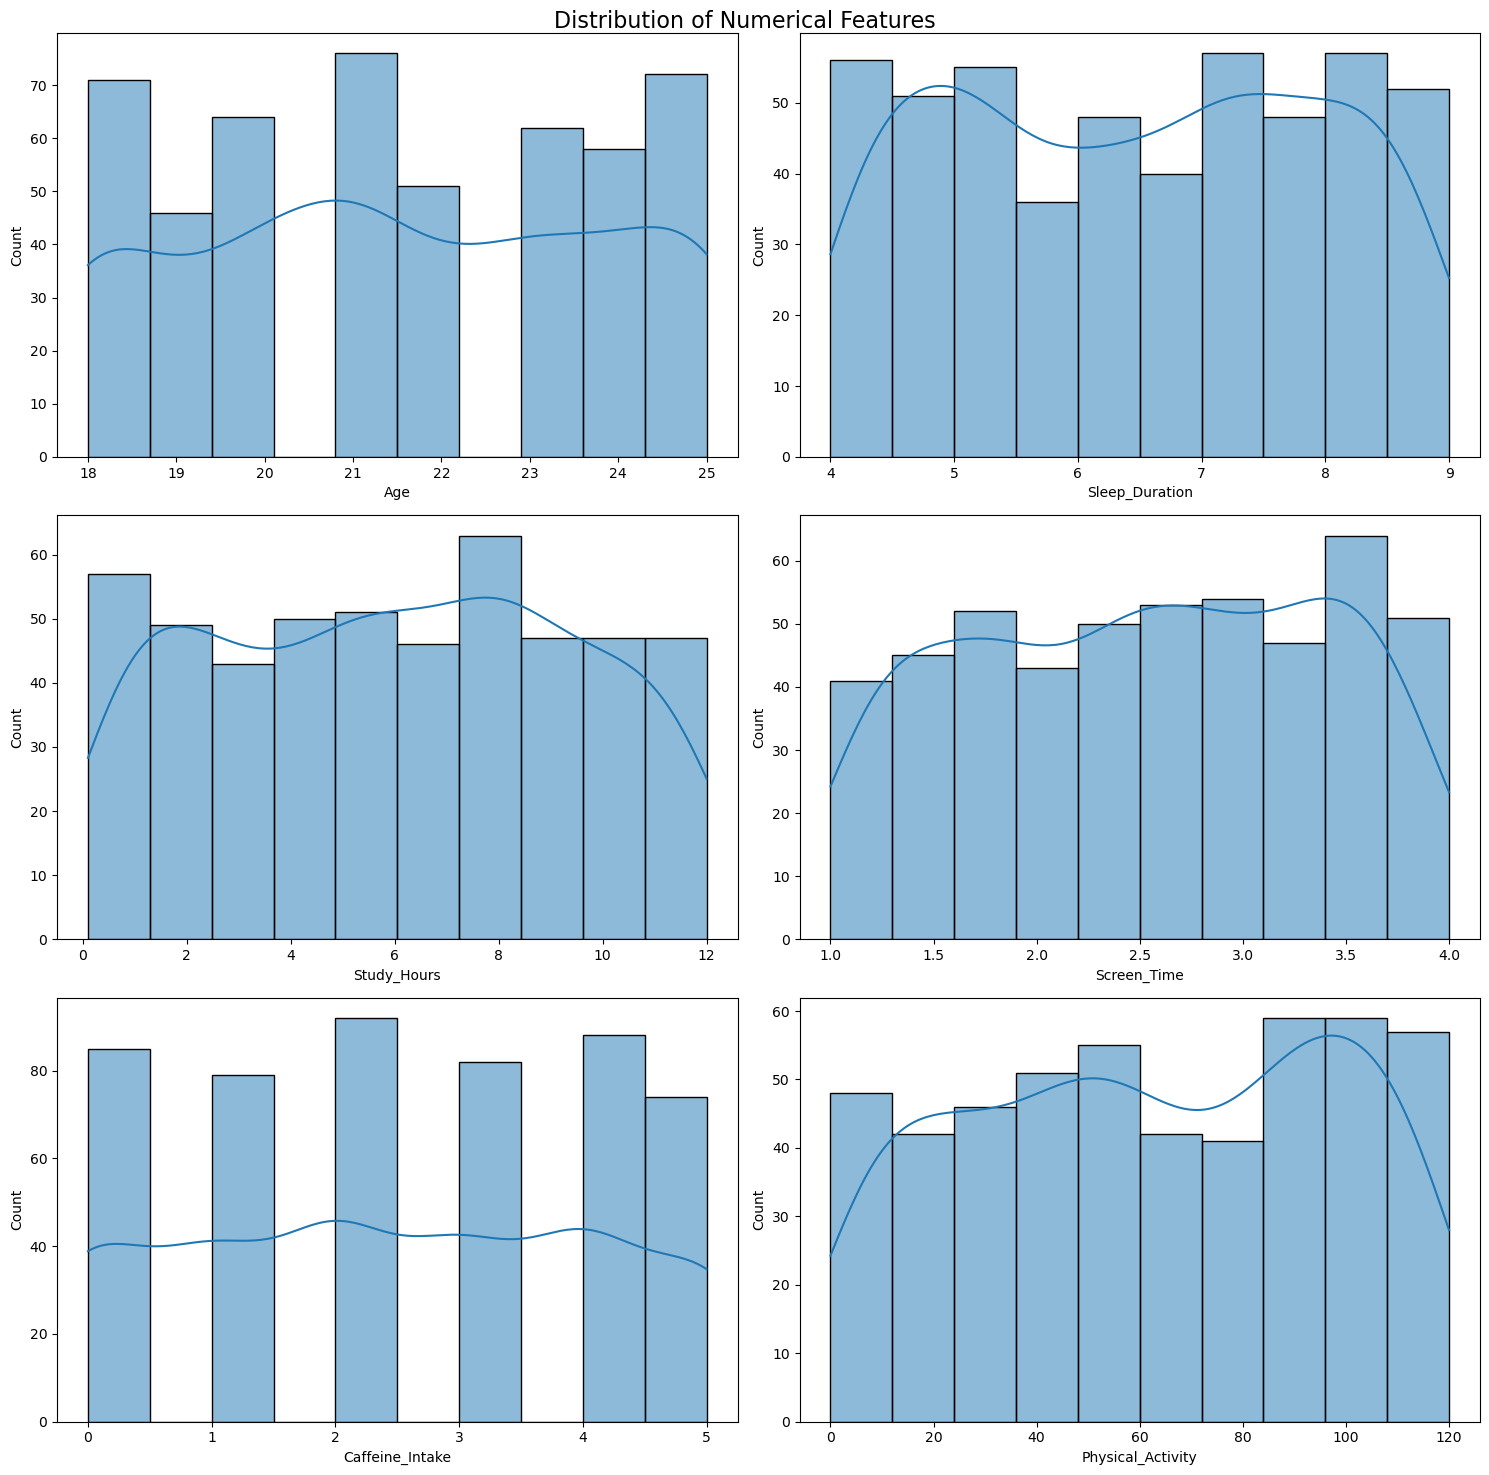

In [4]:
# Exploratory Data Analysis, just gives us a visual of the available data
# Plotting distribution of numerical features
# KDEs are a non-parametric way to estimate the probability density function 
fig, axes = plt.subplots(3, 2, figsize = (15, 15))
sns.histplot(data['Age'], ax = axes[0, 0], kde = True) 
sns.histplot(data['Sleep_Duration'], ax = axes[0, 1], kde = True) 
sns.histplot(data['Study_Hours'], ax = axes[1, 0], kde = True) 
sns.histplot(data['Screen_Time'], ax = axes[1, 1], kde = True) 
sns.histplot(data['Caffeine_Intake'], ax = axes[2, 0], kde =True) 
sns.histplot(data['Physical_Activity'], ax = axes[2, 1], kde = True)
fig.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

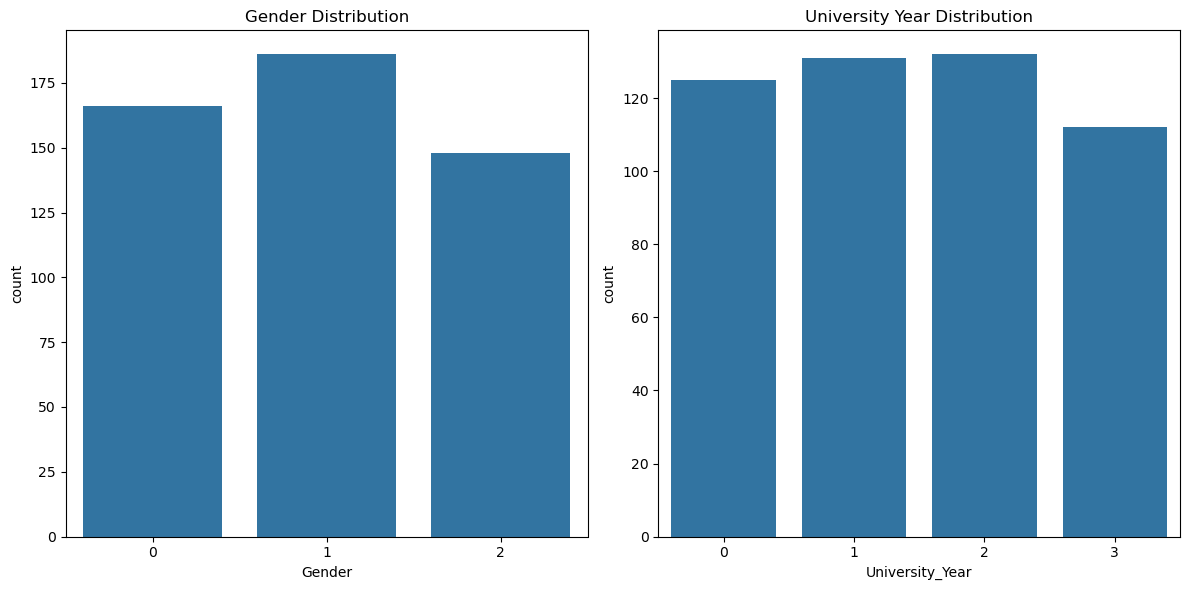

In [5]:
# Categorical Variables Analysis
# Gender and University Year distributions
fig, ax = plt.subplots(1, 2, figsize = (12, 6)) 
sns.countplot(x = 'Gender', data = data, ax = ax[0]) 
sns.countplot(x = 'University_Year', data = data, ax = ax[1]) 
ax[0].set_title('Gender Distribution') 
ax[1].set_title('University Year Distribution') 
plt.tight_layout()
plt.show()

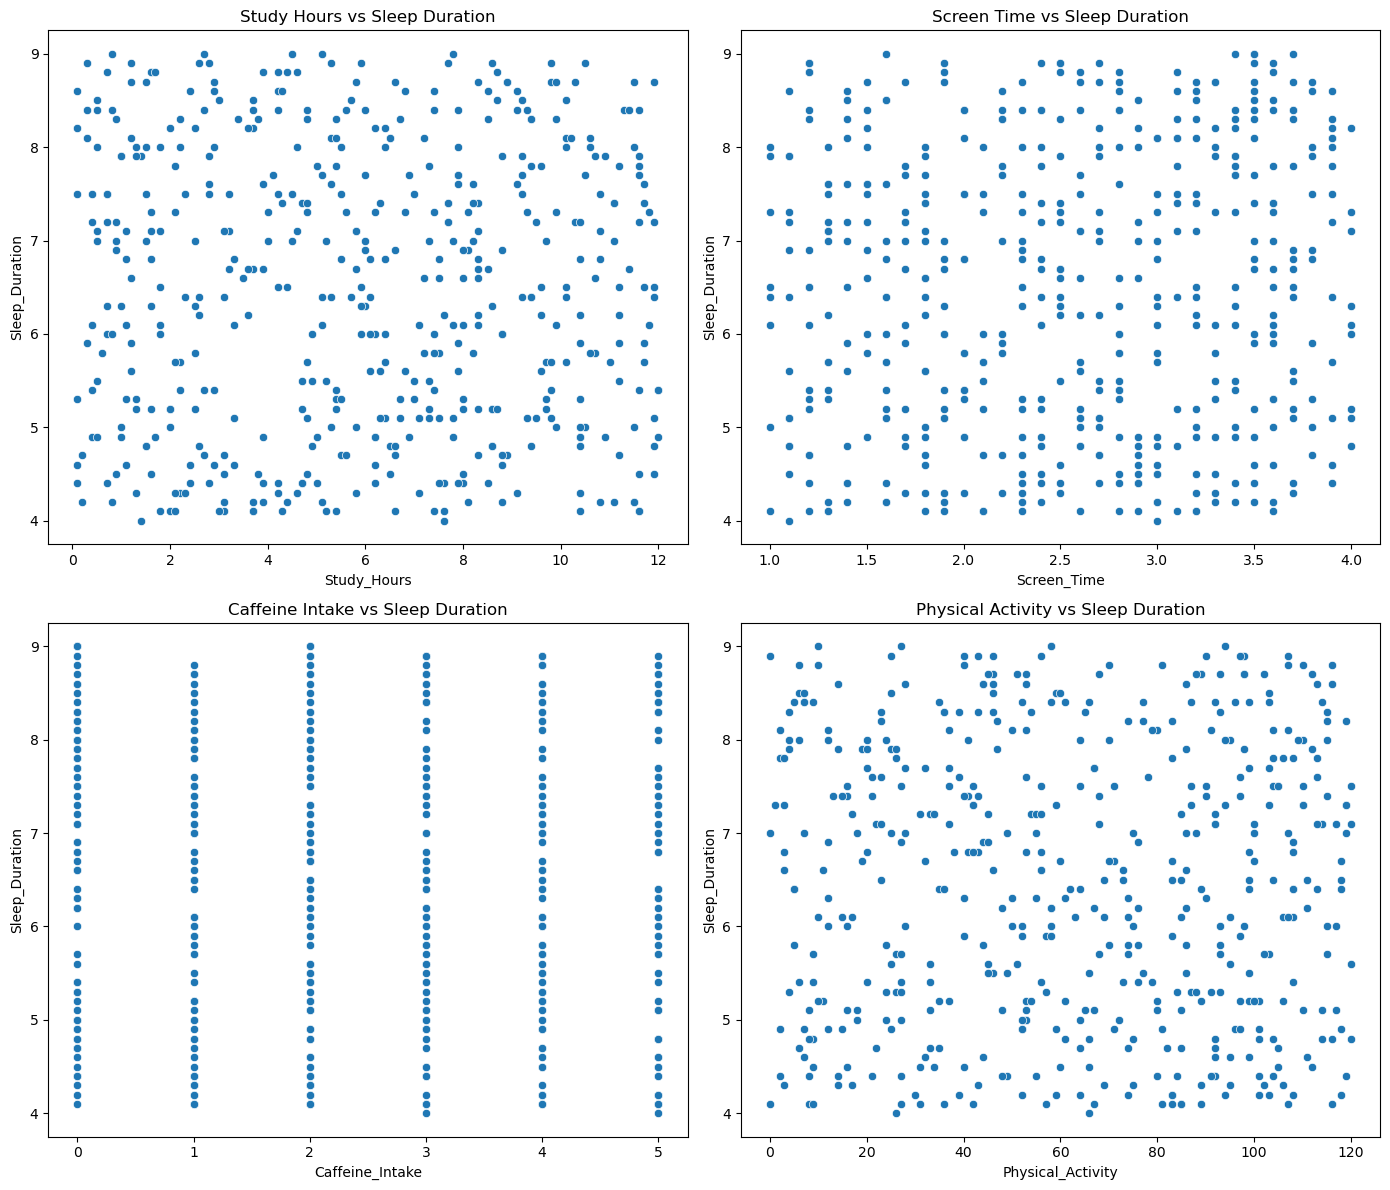

In [6]:
# Bivariate Analysis, finds possible correlations
# Sleep Duration vs. Other Variables
# Gives us a visual of the relationship between Sleep Duration and other variables
fig, axes = plt.subplots(2, 2, figsize = (14, 12))
sns.scatterplot(x = 'Study_Hours', y = 'Sleep_Duration', data = data, ax = axes[0, 0])
sns.scatterplot(x = 'Screen_Time', y = 'Sleep_Duration', data = data, ax = axes[0, 1])
sns.scatterplot(x = 'Caffeine_Intake', y = 'Sleep_Duration', data = data, ax = axes[1, 0])
sns.scatterplot(x = 'Physical_Activity', y = 'Sleep_Duration', data = data, ax = axes[1, 1])
axes[0, 0].set_title('Study Hours vs Sleep Duration')
axes[0, 1].set_title('Screen Time vs Sleep Duration')
axes[1, 0].set_title('Caffeine Intake vs Sleep Duration')
axes[1, 1].set_title('Physical Activity vs Sleep Duration')
plt.tight_layout()
plt.show()

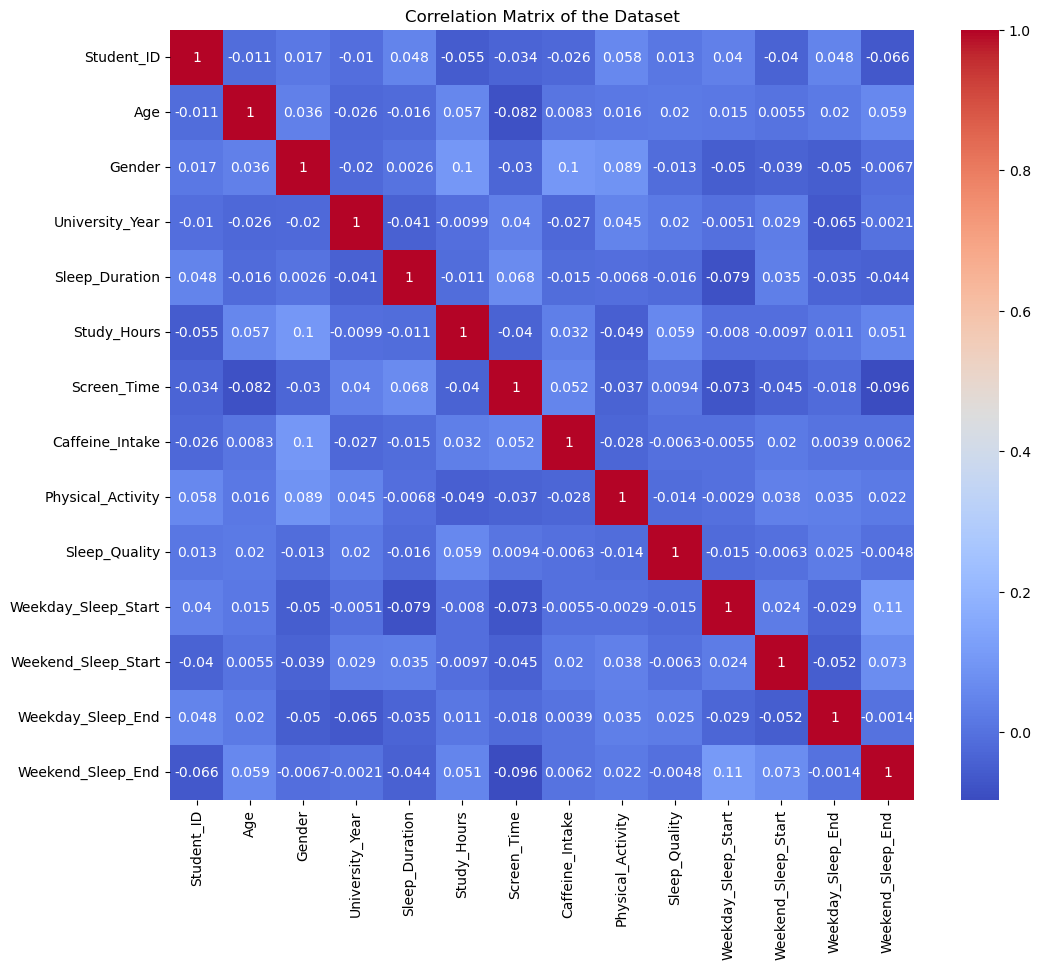

Correlation between Sleep Duration and Study Hours: -0.011092416590548127
Correlation between Screen Time and Sleep Quality: 0.009410629326033452
Correlation between Caffeine Intake and Sleep Quality: -0.0062715127353048005


In [7]:
# Correlation Matrix
correlation_matrix = data.corr()
# Visualize the correlation matrix
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm') 
plt.title('Correlation Matrix of the Dataset')
plt.show()
# Checking specific correlations
print("Correlation between Sleep Duration and Study Hours:", data['Sleep_Duration'].corr(data['Study_Hours']))
print("Correlation between Screen Time and Sleep Quality:", data['Screen_Time']. corr(data['Sleep_Quality']))
print("Correlation between Caffeine Intake and Sleep Quality:", data['Caffeine_Intake'].corr(data['Sleep_Quality']))

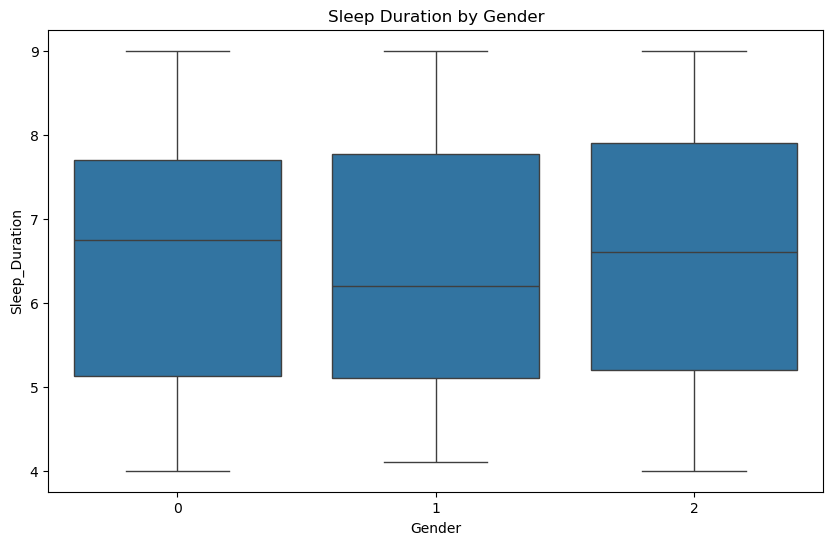

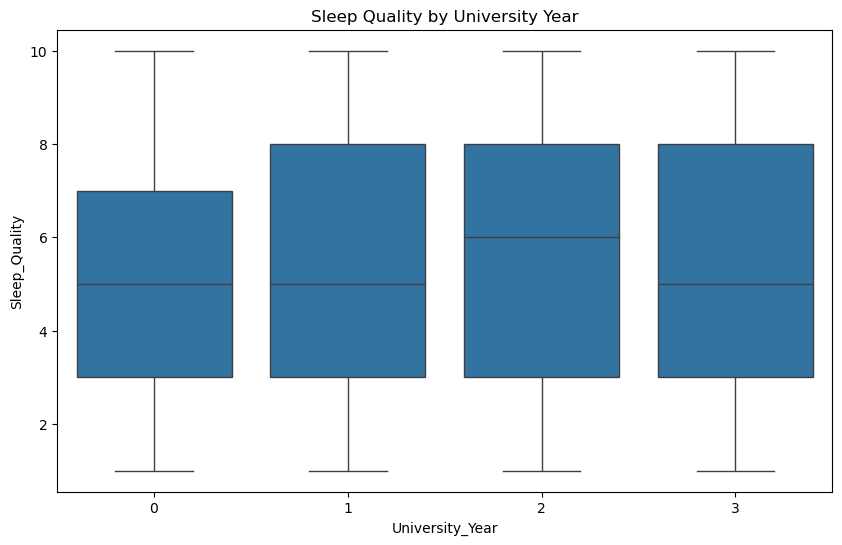

In [8]:
# Sleep Duration by Gender
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Gender', y = 'Sleep_Duration', data = data)
plt.title('Sleep Duration by Gender')
plt.show()
# Sleep Quality by University Year
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'University_Year', y = 'Sleep_Quality', data = data)
plt.title('Sleep Quality by University Year')
plt.show()

In [9]:
# Feature selection
X = data[['Age', 'Sleep_Duration', 'University_Year', 'Study_Hours', 'Screen_Time','Caffeine_Intake', 'Physical_Activity']]
y = data['Sleep_Quality']
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
# Training a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = linear_model.predict(X_test)
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Linear Regression R2 Score: -0.03310677972845455
Mean Squared Error: 9.482359098773399


In [11]:
# Training a Random Forest Model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))

Random Forest R2 Score: -0.1085978810358521
Mean Squared Error: 10.175253333333334


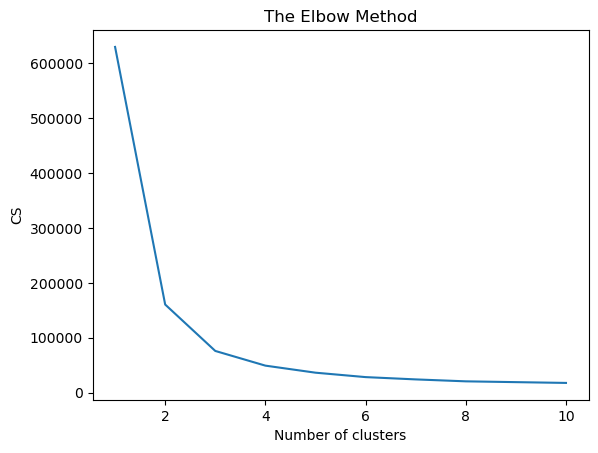

In [12]:
#Kmeans
from sklearn.cluster import KMeans
centroids = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    centroids.append(kmeans.inertia_)
plt.plot(range(1, 11), centroids)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [13]:
# from graph above, we can conclude that 2 clusters are recommended for the data
features = data[['Age', 'University_Year', 'Sleep_Duration',	'Study_Hours',	'Screen_Time',	'Caffeine_Intake',	'Physical_Activity', 'Sleep_Quality']]

#rescaling max and min in each column from 1-10 so no one column dominates the other
#scales the data

features = ((features - features.min())/ (features.max() - features.min())) * 9  + 1

#random centroids

def random_cens(features, k):
    centroids = []
    for i in range(k):
        cen = features.apply(lambda x: float(x.sample()))
        centroids.append(cen)
    return pd.concat(centroids, axis = 1)


In [14]:
# k =2 because we want 2 clusters
centroids = random_cens(features, 2)

#set/get label
def get_labels(features, centroids): 
    distances = centroids.apply(lambda x: np.sqrt(((features - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis = 1)
    
labels = get_labels(features, centroids)
labels.value_counts()

#update centroids
def updated_cens(features, labels, k): 
    return features.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

# write a function to plot the clusters and centrodis
#alogrithm will stop depending on how the clusters intially start out, clusters start out randomly
def clusters_plotted(features, labels, centroids, itr):
    pca = PCA(n_components = 2)
    features_in_2d = pca.fit_transform(features)
    centroids_in_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'ITERATION{itr}')
    plt.scatter(x = features_in_2d[:,0], y = features_in_2d[:,1], c = labels)
    plt.scatter(x = centroids_in_2d[:, 0], y =centroids_in_2d[:,1])
    plt.show()

/tmp/ipykernel_165/1291738871.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cen = features.apply(lambda x: float(x.sample()))


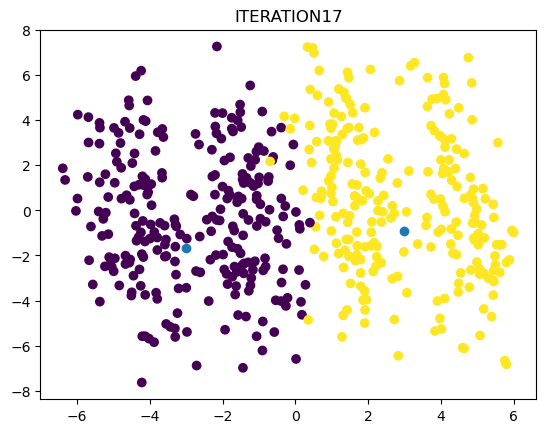

In [15]:
#Brining everything together
#number of clusters
k = 2
max_itr = 50


centroids_count = k
centroids = random_cens(features, k)
past_cens = pd.DataFrame()
itr = 1
while itr < max_itr and not centroids.equals(past_cens):
    past_cens = centroids
    labels = get_labels(features, centroids)
    centroids = updated_cens(features, labels, k)
    clusters_plotted(features, labels, centroids, itr)
    itr += 1

In [16]:
centroids

,0,1
Age,4.433793,4.493209
University_Year,2.032757,8.245188
Sleep_Duration,4.793646,4.502905
Study_Hours,4.621671,4.714897
Screen_Time,4.843530,4.820007
Caffeine_Intake,4.277512,4.327287
Physical_Activity,4.849203,4.969698
Sleep_Quality,4.280141,4.329964


In [17]:
#Neural NetWorks

In [18]:
#determining features
features_cols = ["Sleep_Duration", "Study_Hours", "Screen_Time","Caffeine_Intake","Physical_Activity"]

In [19]:
#determining target
target_col = "Sleep_Quality"

In [20]:
#organizing data into training and testing sets 
X = data[features_cols].values
Y= data[target_col].values
num_samples = X.shape[0]
num_test = int(num_samples * 0.2)
num_train = num_samples - num_test
indices = np.arange(num_samples)
np.random.shuffle(indices)
train_indices = indices[:num_train]
test_indices  = indices[num_train:]
X_train = X[train_indices]
Y_train = Y[train_indices]
X_test  = X[test_indices]
Y_test  = Y[test_indices]

In [21]:
#activation function 
def sigmoid(x):
    prediction = 1/(1+np.exp(-x))
    return prediction

def sigmoid_derivative(x):
    return x * (1 - x)
#FOUND THAT USING THE SOFTMAX ACTUALLY STOPPED THE CHANGE OF THE LOSS VALUE - NOT IN USE ANYMORE
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

#loss function 
def cross_entropy_loss(Y_true, Pred):
    return np.mean((Y_true - Pred)**2)


#forward propagation
def forward(X, W1, b1, W2, b2, W3, b3):
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)
    Z3 = A2 @ W3 + b3
    Pred = Z3 # Linear output
    return Z1, A1, Z2, A2, Z3, Pred

#backwards propagation
def backward(X, Y_true, Z1, A1, Z2, A2, Z3, Pred, W1, W2, W3, b1, b2, b3):
    m = X.shape[0]
    if Y_true.ndim == 1 and Pred.ndim == 2:
        Y_true = Y_true.reshape(-1, 1)

    dZ3 = (2/m)*(Pred - Y_true)      # (m, output_dim)
    dW3 = A2.T @ dZ3                 # (hidden_dim2, output_dim)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = dZ3 @ W3.T                 # (m, hidden_dim2)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = A1.T @ dZ2                 # (hidden_dim1, hidden_dim2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T                 # (m, hidden_dim1)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = X.T @ dZ1                  # (input_dim, hidden_dim1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

#training function (updating the weights and biases)
def train(X, Y_true, input_dim, hidden_dim1, hidden_dim2, output_dim, learning_rate=0.01, epochs=10000):
    # initialization for weights and biases
    W1 = np.random.randn(input_dim, hidden_dim1) * np.sqrt(2.0 / input_dim)
    b1 = np.zeros((1, hidden_dim1))

    W2 = np.random.randn(hidden_dim1, hidden_dim2) * np.sqrt(2.0 / hidden_dim1)
    b2 = np.zeros((1, hidden_dim2))

    
    W3 = np.random.randn(hidden_dim2, output_dim) * 0.01
    b3 = np.zeros((1, output_dim))

    #plot of loss values 
    
    loss_graph = np.array([], dtype=np.float64)
    
    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, Pred = forward(X, W1, b1, W2, b2, W3, b3)
        loss = cross_entropy_loss(Y_true, Pred)
  
        dW1, db1, dW2, db2, dW3, db3 = backward(X, Y_true, Z1, A1, Z2, A2, Z3, Pred, W1, W2, W3, b1, b2, b3)
        loss_graph = np.append(loss_graph, loss)
 
        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.4f}')

        
    print(loss_graph)
            
    
    return W1, b1, W2, b2, W3, b3, loss_graph



In [22]:
#training multiple times to see if the loss values change

W1, b1, W2, b2, W3, b3, loss = train(X_train, Y_train, 5, 10, 10, 1, 0.0001, 10000)
W1, b1, W2, b2, W3, b3, loss = train(X_train, Y_train, 5, 10, 10, 1, 0.0001, 10000)
W1, b1, W2, b2, W3, b3, loss = train(X_train, Y_train, 5, 10, 10, 1, 0.0001, 10000)        

Epoch 0, Loss: 36.7014
Epoch 50, Loss: 35.1060
Epoch 100, Loss: 33.5987
Epoch 150, Loss: 32.1719
Epoch 200, Loss: 30.8193
Epoch 250, Loss: 29.5354
Epoch 300, Loss: 28.3158
Epoch 350, Loss: 27.1565
Epoch 400, Loss: 26.0541
Epoch 450, Loss: 25.0056
Epoch 500, Loss: 24.0084
Epoch 550, Loss: 23.0604
Epoch 600, Loss: 22.1592
Epoch 650, Loss: 21.3032
Epoch 700, Loss: 20.4904
Epoch 750, Loss: 19.7193
Epoch 800, Loss: 18.9883
Epoch 850, Loss: 18.2960
Epoch 900, Loss: 17.6410
Epoch 950, Loss: 17.0220
Epoch 1000, Loss: 16.4376
Epoch 1050, Loss: 15.8865
Epoch 1100, Loss: 15.3676
Epoch 1150, Loss: 14.8794
Epoch 1200, Loss: 14.4209
Epoch 1250, Loss: 13.9907
Epoch 1300, Loss: 13.5876
Epoch 1350, Loss: 13.2105
Epoch 1400, Loss: 12.8581
Epoch 1450, Loss: 12.5292
Epoch 1500, Loss: 12.2226
Epoch 1550, Loss: 11.9373
Epoch 1600, Loss: 11.6720
Epoch 1650, Loss: 11.4257
Epoch 1700, Loss: 11.1972
Epoch 1750, Loss: 10.9856
Epoch 1800, Loss: 10.7898
Epoch 1850, Loss: 10.6088
Epoch 1900, Loss: 10.4417
Epoch 195

In [23]:
#plugging in the testing data
Z1 = X_test @ W1 + b1
A1 = sigmoid(Z1)
Z2 = A1 @ W2 + b2
A2 = sigmoid(Z2)
Z3 = A2 @ W3 + b3
Pred = Z3 

#predictions of the test sample
print("Predicted values of sleep quality: ")
print("---------------------------------------------------------------------------------------------------------------")
print(Pred)

#actual data
print("Corresponding actual values of sleep quality: ")
print("---------------------------------------------------------------------------------------------------------------")
print(Y_test)

Predicted values of sleep quality: 
---------------------------------------------------------------------------------------------------------------
[[5.33796982]
 [5.30382288]
 [5.34175194]
 [5.30482497]
 [5.41694363]
 [5.29112908]
 [5.31031716]
 [5.29395657]
 [5.17004725]
 [5.31105375]
 [5.25433266]
 [5.31091444]
 [5.31111827]
 [5.24530964]
 [5.27560749]
 [5.31114198]
 [5.31115145]
 [5.30367415]
 [5.31116076]
 [5.29431158]
 [5.31118187]
 [5.32298654]
 [5.27860036]
 [5.30122684]
 [5.29897254]
 [5.3086758 ]
 [5.30913962]
 [5.29936014]
 [5.28907914]
 [5.31089931]
 [5.24600748]
 [5.31116814]
 [5.31071534]
 [5.31061822]
 [5.28488537]
 [5.27916471]
 [5.31069229]
 [5.26563441]
 [5.24714468]
 [5.31094547]
 [5.31112719]
 [5.2594249 ]
 [5.30351034]
 [5.31105363]
 [5.36856145]
 [5.31032046]
 [5.31001578]
 [5.27558678]
 [5.30546246]
 [5.25736748]
 [5.30778101]
 [5.24282852]
 [5.30912437]
 [5.28951527]
 [5.30583133]
 [5.30832314]
 [5.31109421]
 [5.31113518]
 [5.30615356]
 [5.3032782 ]
 [5.30276738

Graph of loss values over epochs (iterations)


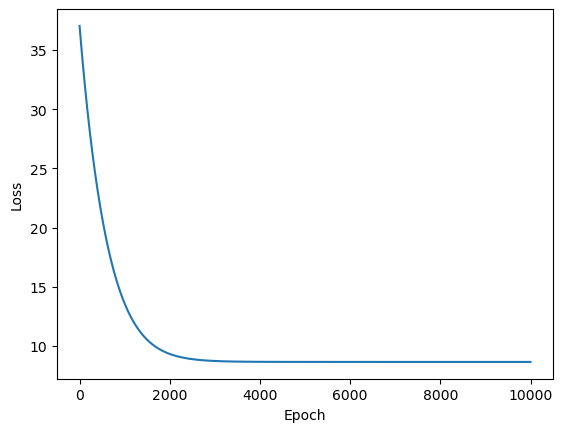

In [24]:
y = loss
print("Graph of loss values over epochs (iterations)")

plt.plot(y)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()